In [ ]:
!pip install deep-xf

     |████████████████████████████████| 23.2 MB 1.8 MB/s 
     |████████████████████████████████| 9.5 MB 27.4 MB/s 
     |████████████████████████████████| 356 kB 43.3 MB/s 
     |████████████████████████████████| 208 kB 45.3 MB/s 
     |████████████████████████████████| 554 kB 44.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=d3aff8d4849ce88c7a605b4cff1371752c33e613bc7264b17c85cb5d67161b58
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43819 sha256=8256f0619c830947323a8fd8b4d231a316067f52238ed499ac8e4f47f4e31c37
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully

"""
@author: Ajay
@Date: 30/10/2021
"""

"""
# Proof-Of-Concept: Denoising ECGs signals recored from sports jacketwear events
"""

In [ ]:
from deep_xf.denoise import *

Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

In [ ]:
ecg_signal_data = pd.read_csv('https://raw.githubusercontent.com/ajayarunachalam/Deep_XF/master/processed_data_ecg/processed_sitting_data.csv', skiprows=0)

In [ ]:
ecg_signal_data.shape

(30000, 7)

In [ ]:
ecg_signal_data.head(2)

,Date,Time,ecg1,ecg2,ecg3,ecg4,ecg5
0,2021-04-07,16:20:12.136000,-0.000101,-0.000105,0.000075,0.000179,-0.000045
1,2021-04-07,16:20:12.138000,-0.000003,-0.000160,0.000104,0.000228,-0.000144


In [ ]:
fs, order, cutoff_high, cutoff_low, powerline, nyq = Denoise.set_parameters(fs = 500, order = 5, cutoff_high = 0.5, cutoff_low = 2, powerline = 60)

fs = 500
order = 5
cutoff_high = 0.5
cutoff_low = 2
powerline = 60


In [ ]:
# remove noise with ensembling of filters

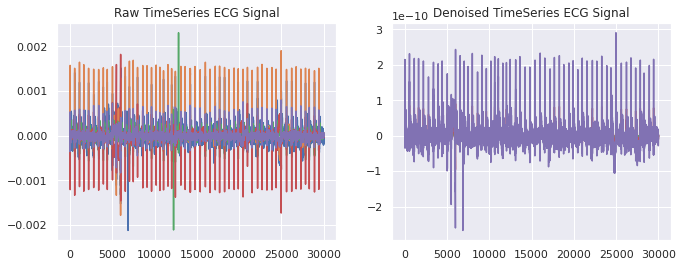

,Date,Time,ecg1,ecg2,ecg3,ecg4,ecg5
0,2021-04-07,16:20:12.136000,-2.969501e-14,-3.241481e-13,-1.728018e-12,-6.065765e-12,-1.601680e-11
1,2021-04-07,16:20:12.138000,-8.499545e-16,-5.554848e-14,-4.767371e-13,-2.066522e-12,-5.939035e-12
2,2021-04-07,16:20:12.140000,-1.053786e-14,-1.611588e-13,-1.049425e-12,-4.155571e-12,-1.179033e-11
3,2021-04-07,16:20:12.142000,2.876824e-14,2.082946e-13,6.777858e-13,1.325488e-12,1.750018e-12
4,2021-04-07,16:20:12.144000,4.329652e-14,3.390716e-13,1.256797e-12,3.049395e-12,5.713758e-12
...,...,...,...,...,...,...,...
29995,2021-04-07,16:21:12.474000,8.968817e-16,2.136266e-15,-2.629700e-14,-2.181268e-13,-9.091869e-13
29996,2021-04-07,16:21:12.476000,1.306427e-14,1.204183e-13,5.432755e-13,1.627322e-12,3.693566e-12
29997,2021-04-07,16:21:12.478000,1.338055e-14,1.231649e-13,5.545122e-13,1.655788e-12,3.741431e-12
29998,2021-04-07,16:21:12.480000,7.411542e-16,-8.031105e-16,-4.813862e-14,-3.150149e-13,-1.215306e-12


In [ ]:
Denoise.plot_and_write(ecg_signal_data, featurecol_index=2, fs=fs, cutoff_high=cutoff_high, cutoff_low=cutoff_low, nyq = nyq, powerline=powerline, order=order)